<b><font color='red'>Note: Parts of the file take long time to run. These parts are marked with comments in red mentioning approx. time required to run that step.</font></b>

# Part 1: Data Collection and Inspection
Let's start with getting the datafile telecom_churn_data.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading data files
telecom = pd.read_csv('telecom_churn_data.csv',encoding='utf-8',low_memory=False)

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# inspect the structure
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


<font color=blue>In the telecom churn dataset we see there are 99999 observations and 226 variables.</font>

# Part 2: Data Cleaning
1. Handling columns with unique values
2. Handling columns with > 70% missing data
3. Handling categorical columns
4. Handling columns having > 3% missing values

<b>1. Handling columns with unique values:</b>

In [5]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

<font color=blue>Lets check the columns having unique values.</font>

In [6]:
# Columns having more than one value
cols_unique = telecom.nunique() != 1
# See the count of columns having more than a single value
cols_unique.value_counts()

True     210
False     16
dtype: int64

In [7]:
# Lets take a look at the columns have unique values 
cols_unique.index[cols_unique == False]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

<font color=blue>circle_id and other mou columns have unique values. Let's drop them.<br/>
lets keep last date of month related columns as they give us the number of days in month which will be useful for further analysis.</font>

In [8]:
telecom = telecom.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
                                       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                                       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
                                       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
                                       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],axis=1)

In [9]:
telecom.shape

(99999, 210)

<b>2. Handling columns with > 70% missing data:</b>

<font color=blue>Now let's check for columns having > 70% missing rows.</font>

In [10]:
# summing up the missing values (column-wise) which have >70% missing values
Cols_Null = round(100*(telecom.select_dtypes(include=[np.number]).isnull().sum()/
                       len(telecom.select_dtypes(include=[np.number]).index)), 2) > 70
Cols_Null.value_counts()

False    166
True      36
dtype: int64

In [11]:
# Index True columns are the columns having missing values
Cols_Null.index[Cols_Null == True]

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [12]:
# Dataframe of Index having missing rows
df_Cols_Null= Cols_Null.index[Cols_Null == True]

<font color=blue>We need to handle the categorical variables night_pck_user and fb_user for all months in different way hence lets separate these out. </font>

In [13]:
# Drop night_pck_user and fb_user for all months 
df_Cols_Null=df_Cols_Null.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                                'night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9'])

In [14]:
# Check the null counts
telecom[df_Cols_Null].isnull().sum()

total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
arpu_3g_6             74846
arpu_3g_7             74428
arpu_3g_8             73660
arpu_3g_9             74077
arpu_2g_6             74846
arpu_2g_7             74428
arpu_2g_8             73660
arpu_2g_9             74077
dtype: int64

<font color=blue>Lets impute the missing values with 0 for the above columns with >70% missing values which have 74846, 74428, 73660, 74077 missing values for months 6,7,8,9 respectively for the rech and arpu columns seen above .</font> 

In [15]:
# Impute missing values with 0
telecom[df_Cols_Null]=telecom[df_Cols_Null].fillna(0)

In [16]:
# Check the columns again there now no missing values
telecom[df_Cols_Null].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
arpu_3g_6             0
arpu_3g_7             0
arpu_3g_8             0
arpu_3g_9             0
arpu_2g_6             0
arpu_2g_7             0
arpu_2g_8             0
arpu_2g_9             0
dtype: int64

<b>3. Handling categorical columns:</b>

In [17]:
# Check the missing values for night pack and fb user
telecom[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
         'fb_user_6','fb_user_7','fb_user_8','fb_user_9']].isnull().sum()

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

In [18]:
#Check the unique values
telecom[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6',
         'fb_user_7','fb_user_8','fb_user_9']].nunique()

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64

<font color=blue>Lets create new category -1 for missing values for categorical variables night_pck_user and fb_user for all months</font>

In [19]:
# Impute the Nulls with new category -1
telecom[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']]\
=telecom[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']]\
.fillna(-1)

In [20]:
# Check again if any missing values we see 0
telecom[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']]\
.isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

<b>4. Handling columns having > 3% missing values:</b>

<font color=blue>Now let's check for columns having > 3% missing values , we see there are 108 columns.</font>

In [21]:
# summing up the missing values (column-wise) in master_frame which have >3% missing values
Cols_Null_3 = round(100*(telecom.select_dtypes(include=[np.number]).isnull().sum()/
                         len(telecom.select_dtypes(include=[np.number]).index)), 2) > 3
Cols_Null_3.value_counts()

True     108
False     94
dtype: int64

In [22]:
# Index True columns are the columns having missing values
Cols_Null_3.index[Cols_Null_3 == True]

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9'],
      dtype='object', length=108)

In [23]:
# Dataframe of Index having missing rows
df_null3= Cols_Null_3.index[Cols_Null_3 == True]

In [24]:
# Check the null counts
telecom[df_null3].isnull().sum()

onnet_mou_6         3937
onnet_mou_7         3859
onnet_mou_8         5378
onnet_mou_9         7745
offnet_mou_6        3937
offnet_mou_7        3859
offnet_mou_8        5378
offnet_mou_9        7745
roam_ic_mou_6       3937
roam_ic_mou_7       3859
roam_ic_mou_8       5378
roam_ic_mou_9       7745
roam_og_mou_6       3937
roam_og_mou_7       3859
roam_og_mou_8       5378
roam_og_mou_9       7745
loc_og_t2t_mou_6    3937
loc_og_t2t_mou_7    3859
loc_og_t2t_mou_8    5378
loc_og_t2t_mou_9    7745
loc_og_t2m_mou_6    3937
loc_og_t2m_mou_7    3859
loc_og_t2m_mou_8    5378
loc_og_t2m_mou_9    7745
loc_og_t2f_mou_6    3937
loc_og_t2f_mou_7    3859
loc_og_t2f_mou_8    5378
loc_og_t2f_mou_9    7745
loc_og_t2c_mou_6    3937
loc_og_t2c_mou_7    3859
                    ... 
loc_ic_mou_8        5378
loc_ic_mou_9        7745
std_ic_t2t_mou_6    3937
std_ic_t2t_mou_7    3859
std_ic_t2t_mou_8    5378
std_ic_t2t_mou_9    7745
std_ic_t2m_mou_6    3937
std_ic_t2m_mou_7    3859
std_ic_t2m_mou_8    5378


<font color=blue>We will impute the missing values with 0 for mou columns for all months seen above.</font>

In [25]:
# Impute the nulls with 0
telecom[df_null3]=telecom[df_null3].fillna(0)

In [26]:
# Check the null count again
telecom[df_null3].isnull().sum()

onnet_mou_6         0
onnet_mou_7         0
onnet_mou_8         0
onnet_mou_9         0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
offnet_mou_9        0
roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
roam_ic_mou_9       0
roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
roam_og_mou_9       0
loc_og_t2t_mou_6    0
loc_og_t2t_mou_7    0
loc_og_t2t_mou_8    0
loc_og_t2t_mou_9    0
loc_og_t2m_mou_6    0
loc_og_t2m_mou_7    0
loc_og_t2m_mou_8    0
loc_og_t2m_mou_9    0
loc_og_t2f_mou_6    0
loc_og_t2f_mou_7    0
loc_og_t2f_mou_8    0
loc_og_t2f_mou_9    0
loc_og_t2c_mou_6    0
loc_og_t2c_mou_7    0
                   ..
loc_ic_mou_8        0
loc_ic_mou_9        0
std_ic_t2t_mou_6    0
std_ic_t2t_mou_7    0
std_ic_t2t_mou_8    0
std_ic_t2t_mou_9    0
std_ic_t2m_mou_6    0
std_ic_t2m_mou_7    0
std_ic_t2m_mou_8    0
std_ic_t2m_mou_9    0
std_ic_t2f_mou_6    0
std_ic_t2f_mou_7    0
std_ic_t2f_mou_8    0
std_ic_t2f_mou_9    0
std_ic_mou

In [27]:
# summing up the missing values (column-wise) in master_frame which have >0% missing values
null = round(100*(telecom.isnull().sum()/len(telecom.index)), 2) > 0
null.value_counts()

False    202
True       8
dtype: int64

In [28]:
# sum it up to check how many rows have all missing values
telecom.isnull().all(axis=1).sum()

0

<font color=blue>There were no missing values. There are date fields which have missing values which will be handled seperately later.</font>

# Part 3: Data Preparation
1. Filtering high-value customers
2. Tag churners and remove attributes of the churn phase
3. Replace each categorical variable with the churn rate
4. Creating derived variables
5. Capping Outliers

<b>1. Filter high-value customers:</b>
- Find total recharge amount for data by multiplying average rech amt data and total rech data foreach customer in the first 2 months
- Find the Avg rech amt by adding rech amt for data and talktime(total_rech_amt) for months 6 and 7 and take its Average
- Find 70th percentile of average recharge amount in the first 2 months

In [29]:
# Calculate the total rech amt for data as multiplication of average rech amt data and data units
telecom['total_rech_amt_data_6']=telecom['av_rech_amt_data_6']*telecom['total_rech_data_6']
telecom['total_rech_amt_data_7']=telecom['av_rech_amt_data_7']*telecom['total_rech_data_7']

In [30]:
# Take the Average of Total rech Amt data and Calls for months 6 and 7 (goodphase)
telecom['avg_rech_amt_6and7']=(telecom['total_rech_amt_6']+telecom['total_rech_amt_7']+\
telecom['total_rech_amt_data_6']+telecom['total_rech_amt_data_7'])/4

<font color=blue>Find 70th percentile of average recharge amount in the first 2 months</font>

In [31]:
telecom_highvalue=telecom[(telecom['avg_rech_amt_6and7']>=telecom['avg_rech_amt_6and7'].quantile(0.7))]
telecom_highvalue.shape

(30001, 213)

<b>2. Tag churners and remove attributes of the churn phase</b>
- create column churn based on total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9
- drop all attributes from churn phase

In [32]:
telecom_highvalue['churn'] = np.where((telecom_highvalue.total_ic_mou_9 == 0) &
                       (telecom_highvalue.total_og_mou_9 == 0) &
                       (telecom_highvalue.vol_2g_mb_9 == 0) &
                       (telecom_highvalue.vol_3g_mb_9 == 0),1, 0)
telecom_highvalue.head()

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_6and7,churn
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,...,-1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,279.5,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,...,-1.0,802,57.74,19.38,18.74,0.00,0.0,0.0,592.5,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,-1.0,315,21.03,910.65,122.16,0.00,0.0,354.0,348.0,0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,-1.0,720,0.00,0.00,0.00,0.00,0.0,0.0,320.0,0
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,291.5,0


<font color=blue>Let's drop the 9 month columns as we are done with identifying the churn column.</font>

In [33]:
telecom_highvalue = telecom_highvalue[telecom_highvalue.columns.drop(list(telecom_highvalue.filter(regex='_9|sep')))]
telecom_highvalue.shape

(30001, 162)

<b>3. Replace each categorical variable with the churn rate:</b>
- The categorical variables need to be handled before performing PCA. For each category (level) of a categorical variable we will compute the churn rate (i.e. no. of churn/non-churn + churn) and replace each categorical variable with the churn rate.

In [34]:
#Check the unique values
telecom_highvalue[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].nunique()

night_pck_user_6    3
night_pck_user_7    3
night_pck_user_8    3
fb_user_6           3
fb_user_7           3
fb_user_8           3
dtype: int64

<font color=blue>There are 3 categories in each categorical column (1, 0, -1).</font>

In [35]:
categorical_columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                       'fb_user_6','fb_user_7','fb_user_8']

for column in categorical_columns:
    print(column)
    df=telecom_highvalue.groupby([column])['churn'].value_counts(normalize=True).reset_index(name='percentage')
    mapval=df[(df.churn==1)].set_index(column)[['percentage']].to_dict().get('percentage', "")
    telecom_highvalue.loc[:,column] = telecom_highvalue[column].map(mapval)

night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8


In [36]:
telecom_highvalue[['night_pck_user_6','night_pck_user_7','night_pck_user_8',
                       'fb_user_6','fb_user_7','fb_user_8']].head()


,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,0.066977,0.055869,0.028824,0.066860,0.055146,0.024314
7,0.098754,0.114802,0.141088,0.098754,0.114802,0.141088
8,0.098754,0.055869,0.028824,0.098754,0.055146,0.024314
21,0.098754,0.114802,0.141088,0.098754,0.114802,0.141088
23,0.098754,0.055869,0.028824,0.098754,0.055146,0.024314


<font color=blue>We have replaced the categories in categorical columns with churn rate.</font>

<font color=blue>Let's handle the date columns.</font>

<b>4. Derived variables:</b>

- Let's convert the last date of recharge column across the 3 months to single column as <b>days since last recharge</b>.<br/> First we need to convert the date columns to datetime format and get the latest date of recharge

In [37]:
date_columns = list(telecom_highvalue.filter(regex='date'))
for date_column in date_columns:
    telecom_highvalue[date_column]=pd.to_datetime(telecom_highvalue[date_column])

In [38]:
telecom_highvalue['date_of_last_recharge'] = telecom_highvalue[['date_of_last_rech_6',
                                                                'date_of_last_rech_7',
                                                                'date_of_last_rech_8']].max(axis=1)

In [39]:
telecom_highvalue['date_of_last_recharge'].isnull().sum()

0

<font color=blue>We have the date_of_last_recharge with no null values<br/>
Now let's get the days since last recharge from the date_of_last_recharge. Let's take the last date of august as the reference date.</font>

In [40]:
from datetime import datetime

telecom_highvalue['days_since_last_recharge'] = telecom_highvalue['date_of_last_recharge'].apply(lambda x: datetime(2014, 8, 31) - x)
telecom_highvalue['days_since_last_recharge'] = telecom_highvalue['days_since_last_recharge'].apply(lambda x: x.days)

In [41]:
telecom_highvalue[['date_of_last_recharge','days_since_last_recharge']].head()

,date_of_last_recharge,days_since_last_recharge
0,2014-08-08,23
7,2014-08-26,5
8,2014-08-30,1
21,2014-08-31,0
23,2014-08-24,7


- Let's convert the last date of recharge data column across the 3 months to single column as <b>days since last recharge data<b>.

In [42]:
telecom_highvalue['date_of_last_recharge_data'] = telecom_highvalue[['date_of_last_rech_data_6',
                                                                'date_of_last_rech_data_7',
                                                                'date_of_last_rech_data_8']].max(axis=1)

In [43]:
telecom_highvalue['date_of_last_recharge_data'].isnull().sum()

9222

<font color=blue>We have the date_of_last_recharge_data with null values for instances where customer has not recharged for data.<br/>
Now let's get the days since last recharge data from the date_of_last_recharge_data. Let's take the last date of august as the reference date.</font>

In [44]:
#telecom_highvalue['days_since_last_recharge_data'] = date(2014, 8, 31) - telecom_highvalue['date_of_last_recharge_data']
telecom_highvalue['days_since_last_recharge_data'] = datetime(2014, 8, 31) - telecom_highvalue['date_of_last_recharge_data']
telecom_highvalue['days_since_last_recharge_data'] = telecom_highvalue['days_since_last_recharge_data'].apply(lambda x: x.days)

In [45]:
telecom_highvalue[['date_of_last_recharge_data','days_since_last_recharge_data']].head()

,date_of_last_recharge_data,days_since_last_recharge_data
0,2014-08-08,23.0
7,NaT,NaN
8,2014-08-23,8.0
21,NaT,NaN
23,2014-08-06,25.0


<font color=blue>We have the days_since_last_recharge_data with null values for instances where customer has not recharged for data. Let's inmpute such values with -1.<br/>

In [46]:
# Impute missing values with -1
telecom_highvalue['days_since_last_recharge_data']=telecom_highvalue['days_since_last_recharge_data'].fillna(-1)

In [47]:
telecom_highvalue[['date_of_last_recharge_data','days_since_last_recharge_data']].head()

,date_of_last_recharge_data,days_since_last_recharge_data
0,2014-08-08,23.0
7,NaT,-1.0
8,2014-08-23,8.0
21,NaT,-1.0
23,2014-08-06,25.0


<font color=blue>Lets drop the recharge date columns as their information is captured in days_since_last_recharge and days_since_last_recharge_data column.</font>

In [48]:
telecom_highvalue = telecom_highvalue.drop(['date_of_last_rech_6', 'date_of_last_rech_7',
                                            'date_of_last_rech_8', 'date_of_last_recharge',
                                           'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
                                            'date_of_last_rech_data_8', 'date_of_last_recharge_data'],axis=1)

- Let derive following features based on ratio of different features:
    - <b>ratio of outgoing and incoming calls</b>
    - <b>ratio of local and std outgoing calls</b>
    - <b>ratio of local and std incoming calls</b>

<font color=blue>As some values are zero we will add 0.01 to the denominators and 0.02 to the numerator to balance out the adjustment</font>

In [49]:
# ratio of outgoing and incoming calls
telecom_highvalue['ratio_og_ic_6']=(telecom_highvalue.total_og_mou_6+0.02)/(telecom_highvalue.total_ic_mou_6+0.01)
telecom_highvalue['ratio_og_ic_7']=(telecom_highvalue.total_og_mou_7+0.02)/(telecom_highvalue.total_ic_mou_7+0.01)
telecom_highvalue['ratio_og_ic_8']=(telecom_highvalue.total_og_mou_8+0.02)/(telecom_highvalue.total_ic_mou_8+0.01)

# ratio of local and std outgoing calls
telecom_highvalue['ratio_loc_std_og_6']=(telecom_highvalue.loc_og_mou_6+0.02)/(telecom_highvalue.std_og_mou_6+0.01)
telecom_highvalue['ratio_loc_std_og_7']=(telecom_highvalue.loc_og_mou_7+0.02)/(telecom_highvalue.std_og_mou_7+0.01)
telecom_highvalue['ratio_loc_std_og_8']=(telecom_highvalue.loc_og_mou_8+0.02)/(telecom_highvalue.std_og_mou_8+0.01)

#ratio of local and std incoming calls
telecom_highvalue['ratio_loc_std_ic_6']=(telecom_highvalue.loc_ic_mou_6+0.02)/(telecom_highvalue.std_ic_mou_6+0.01)
telecom_highvalue['ratio_loc_std_ic_7']=(telecom_highvalue.loc_ic_mou_7+0.02)/(telecom_highvalue.std_ic_mou_7+0.01)
telecom_highvalue['ratio_loc_std_ic_8']=(telecom_highvalue.loc_ic_mou_8+0.02)/(telecom_highvalue.std_ic_mou_8+0.01)

<font color=blue>Check null columns</font>

In [50]:
null_columns_count = pd.DataFrame(telecom_highvalue.isnull().sum()).rename(columns={0:'null_count'})
null_columns_count.loc[(null_columns_count.null_count > 0)]

,null_count


<font color=blue>There are no null columns</font>

In [51]:
telecom_highvalue.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,days_since_last_recharge_data,ratio_og_ic_6,ratio_og_ic_7,ratio_og_ic_8,ratio_loc_std_og_6,ratio_loc_std_og_7,ratio_loc_std_og_8,ratio_loc_std_ic_6,ratio_loc_std_ic_7,ratio_loc_std_ic_8
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,23.0,2.000000,2.000000,0.003670,2.000000,2.000000,2.000000,2.000000,2.000000,546.000000
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,-1.0,0.778250,1.091766,0.816746,6.935765,7.104857,3.285934,2.369981,2.052400,0.969631
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,8.0,4.894387,15.146667,10.367372,2.902510,2.008502,0.641571,3.629679,5.107066,20.802632
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,-1.0,4.154322,7.799924,4.093315,0.127158,0.100685,0.138219,1.532958,1.983265,1.561016
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,25.0,1.123840,0.628354,0.802775,55.666667,21.022013,4.597678,39.542373,11.706711,3.913264


In [52]:
telecom_highvalue.info(max_cols=158)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 167 entries, mobile_number to ratio_loc_std_ic_8
dtypes: float64(139), int32(1), int64(27)
memory usage: 39.6 MB


<b>5. Handling Outliers</b>
- Capping:
     For missing values that lie outside the 1.5 * IQR limits, we will cap it by replacing those observations outside the lower limit with the value of 5th %ile and those that lie above the upper limit, with the value of 95th %ile

In [53]:
#Lets look at the spread of the data
telecom_highvalue.describe([.01, .05, .25, .5, .75,.95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,days_since_last_recharge_data,ratio_og_ic_6,ratio_og_ic_7,ratio_og_ic_8,ratio_loc_std_og_6,ratio_loc_std_og_7,ratio_loc_std_og_8,ratio_loc_std_ic_6,ratio_loc_std_ic_7,ratio_loc_std_ic_8
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3.000100e+04,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,...,13.825906,74.497779,83.601405,67.885945,3945.608493,4050.837112,3.747952e+03,2883.707749,2856.080703,2779.876925
std,6.908784e+05,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,498.923555,482.062509,...,19.973971,2848.680531,3403.640223,3309.117617,18314.337771,18020.393543,1.773503e+04,14591.704380,13735.391628,13385.531179
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000009,0.000007,0.000010,0.000005,0.000010,7.336165e-06,0.000014,0.000006,0.000023
1%,7.000026e+09,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000688,0.000581,0.000534,0.003337,0.004224,3.899610e-03,0.075653,0.081371,0.084018
5%,7.000126e+09,112.510000,114.273000,9.550000,0.000000,0.000000,0.000000,0.210000,0.050000,0.000000,...,-1.000000,0.097856,0.080162,0.066781,0.020233,0.022739,2.406193e-02,0.416735,0.424619,0.444463
25%,7.000609e+09,309.865000,309.826000,231.473000,17.080000,16.030000,10.390000,71.610000,69.910000,46.740000,...,-1.000000,0.765847,0.740841,0.705317,0.247847,0.254983,3.395167e-01,2.232072,2.255618,2.000000
50%,7.001203e+09,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,220.030000,182.790000,...,5.000000,1.777799,1.752198,1.661779,2.000000,2.000000,2.000000e+00,9.942979,9.969037,9.807018
75%,7.001804e+09,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,494.010000,438.890000,...,21.000000,4.429722,4.420072,3.660731,62.755294,72.737460,6.800000e+01,75.784397,80.848806,80.784698
95%,7.002285e+09,1240.964000,1261.272000,1255.019000,1135.440000,1185.790000,1074.590000,1256.610000,1272.290000,1167.540000,...,60.000000,23.081376,21.303936,19.785542,23060.000000,24030.000000,2.186500e+04,15918.000000,16361.000000,15403.000000


In [54]:
telecom_columns_to_cap = list(telecom_highvalue.describe().columns)

<font color=blue>We first need to remove columns which do not need to be capped like churn, mobile no.</font>

In [55]:
telecom_columns_to_cap.remove('churn')
telecom_columns_to_cap.remove('mobile_number')

In [56]:
# outlier capping
    
for column in telecom_columns_to_cap:
    Q1 = telecom_highvalue[column].quantile(0.25)
    Q3 = telecom_highvalue[column].quantile(0.75)
    IQR = Q3 - Q1
    telecom_highvalue[column][telecom_highvalue[column] < (Q1 - 1.5*IQR)] = Q1 - 1.5*IQR
    telecom_highvalue[column][telecom_highvalue[column] > (Q3 + 1.5*IQR)] = Q3 + 1.5*IQR

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
#Lets look at the spread of the data
telecom_highvalue.describe([.01, .05, .25, .5, .75,.95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,days_since_last_recharge_data,ratio_og_ic_6,ratio_og_ic_7,ratio_og_ic_8,ratio_loc_std_og_6,ratio_loc_std_og_7,ratio_loc_std_og_8,ratio_loc_std_ic_6,ratio_loc_std_ic_7,ratio_loc_std_ic_8
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,533.064230,534.336534,482.702371,194.427096,195.976315,160.661494,331.866961,334.832298,292.397462,...,12.783607,3.143702,3.109951,2.647518,40.724545,46.970835,44.218652,51.291712,54.491310,54.503903
std,6.908784e+05,311.193166,310.952287,337.183706,235.399221,238.368228,198.856299,328.149488,334.958061,307.118147,...,17.043033,3.273757,3.262497,2.647164,63.063636,73.272672,68.621224,71.779316,76.875216,77.045871
min,7.000000e+09,-275.252000,-272.907500,-413.554000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000009,0.000007,0.000010,0.000005,0.000010,0.000007,0.000014,0.000006,0.000023
1%,7.000026e+09,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000688,0.000581,0.000534,0.003337,0.004224,0.003900,0.075653,0.081371,0.084018
5%,7.000126e+09,112.510000,114.273000,9.550000,0.000000,0.000000,0.000000,0.210000,0.050000,0.000000,...,-1.000000,0.097856,0.080162,0.066781,0.020233,0.022739,0.024062,0.416735,0.424619,0.444463
25%,7.000609e+09,309.865000,309.826000,231.473000,17.080000,16.030000,10.390000,71.610000,69.910000,46.740000,...,-1.000000,0.765847,0.740841,0.705317,0.247847,0.254983,0.339517,2.232072,2.255618,2.000000
50%,7.001203e+09,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,220.030000,182.790000,...,5.000000,1.777799,1.752198,1.661779,2.000000,2.000000,2.000000,9.942979,9.969037,9.807018
75%,7.001804e+09,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,494.010000,438.890000,...,21.000000,4.429722,4.420072,3.660731,62.755294,72.737460,68.000000,75.784397,80.848806,80.784698
95%,7.002285e+09,1240.964000,1261.272000,1255.019000,700.480000,701.555000,584.315000,1112.435000,1130.160000,1027.115000,...,54.000000,9.925536,9.938918,8.093852,156.516464,181.461176,169.490725,186.112884,198.738589,198.961744


<font color=blue>We see above that the outlier values have been capped.</font>

# Part 4: Data Exploration
1. Correlation of important variables
2. Churn for total recharge amount data and call for months 6, 7, 8
3. Impact of customer recharge behaviour on average revenue per user from calls and data
4. Impact of Age on Network on churn

<b>1. Correlation of important variables:</b>

<font color=blue>Let's now make a pairwise scatter plot and observe linear relationships for important variables. Variable considered are total og/ic mou variables, arpu variables, total rech amount variables, ratio variables, duration variables</font>

In [58]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
            'arpu_6', 'arpu_7', 'arpu_8', 'total_ic_mou_6', 'total_ic_mou_7',
            'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
            'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
            'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
            'arpu_2g_7', 'arpu_2g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
            'total_rech_amt_data_6', 'total_rech_amt_data_7',
            'ratio_og_ic_6', 'ratio_og_ic_7', 'ratio_og_ic_6',
            'ratio_loc_std_og_6', 'ratio_loc_std_og_7', 'ratio_loc_std_og_8',
            'ratio_loc_std_ic_6', 'ratio_loc_std_ic_7', 'ratio_loc_std_ic_8',
            'days_since_last_recharge', 'days_since_last_recharge_data', 'aon',
            'churn']

# correlation matrix
cor = telecom_highvalue[columns].corr()

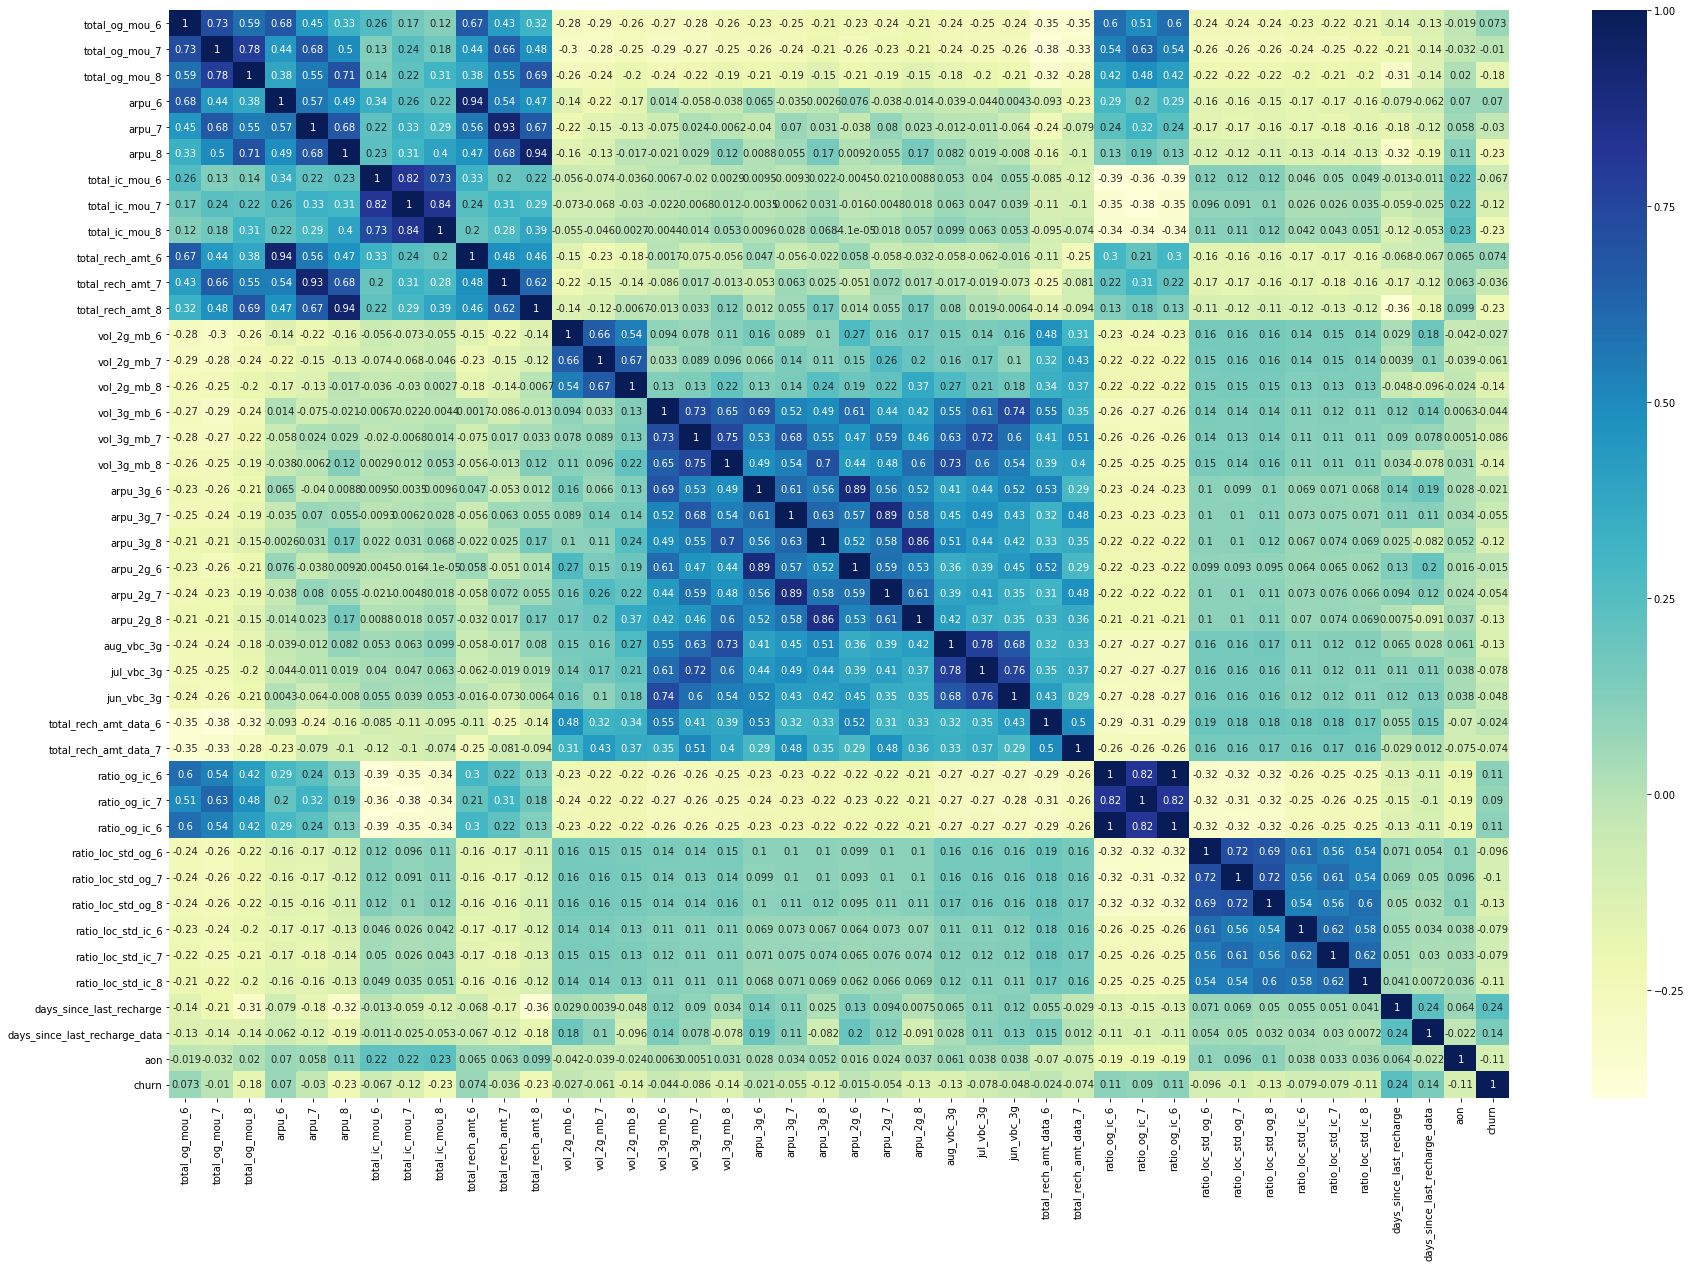

In [59]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

<font color=blue><b>The heatmap shows some useful insights:</b><br/>

<b>Correlation of churn with independent variables:</b><br/>
(In our case churn is a categorical variable with 2 values 0 (non-churn), 1 (churn). So a positive correlalation would indicate increase in churn customer with increase in independent var. and a negative corr. would indicate decrease in churn with increase in variable.)<br/>
Churn has moderate correlation with days_since_last_recharge indicating churn when customer has not recharged since many days.<br/>
Churn has moderate negative correlation with total_og_mou, total_ic_mou and arpu in month 8 indicating reduced usage by churn customer in month 8.<br/>

<b>Correlation among independent variables:</b><br/>
There is high correlation between the og mou and the total recharge amount of each month.<br/>
There is also high correlation between the og mou and the arpu of each month.<br/>
There is high correlation between 2g usage volume across all 3 months.<br/>
There is high correlation between 3g usage volume across all 3 months.<br/>
There is high correlation between 3g usage volume and vbc_3g in each month.<br/>
</font>

<b>2. Churn for total recharge amount data and call for months 6, 7, 8:</b>

<font color=blue>Let's look at the churn for total recharge amount data and call for months 6, 7, 8 . </font>

In [60]:
cols_Rechg=['churn','av_rech_amt_data_8','total_rech_data_8','total_rech_amt_data_6','total_rech_amt_data_7',
            'total_rech_amt_data_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
df_Total_Rechg=telecom_highvalue.loc[:,cols_Rechg]
df_Total_Rechg['total_rech_amt_data_8']=df_Total_Rechg['av_rech_amt_data_8']*df_Total_Rechg['total_rech_data_8']
df_Total_Rechg['total_rech_amt_dataAndcall_6']=df_Total_Rechg['total_rech_amt_data_6']+df_Total_Rechg['total_rech_amt_6']
df_Total_Rechg['total_rech_amt_dataAndcall_7']=df_Total_Rechg['total_rech_amt_data_7']+df_Total_Rechg['total_rech_amt_7']
df_Total_Rechg['total_rech_amt_dataAndcall_8']=df_Total_Rechg['total_rech_amt_data_8']+df_Total_Rechg['total_rech_amt_8']

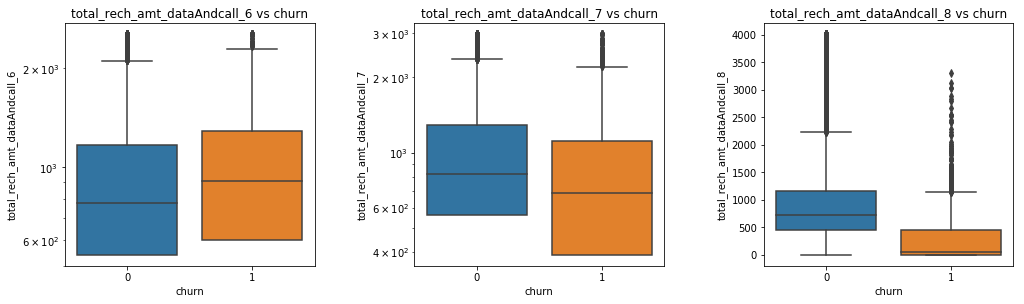

In [61]:
# adjust figure size
plt.figure(figsize=(17, 5))
# subplot 1: 
plt.subplot(1,3, 1)
sns.boxplot( y='total_rech_amt_dataAndcall_6',x='churn', data=df_Total_Rechg)
plt.yscale('log')
plt.title("total_rech_amt_dataAndcall_6 vs churn")
# subplot 2: 
plt.subplot(1, 3, 2)
sns.boxplot( y='total_rech_amt_dataAndcall_7',x='churn', data=df_Total_Rechg)
plt.title("total_rech_amt_dataAndcall_7 vs churn")
plt.yscale('log')
# subplot 3: 
plt.subplot(1, 3, 3)
sns.boxplot( y='total_rech_amt_dataAndcall_8',x='churn', data=df_Total_Rechg)
plt.title("total_rech_amt_dataAndcall_8 vs churn")
#plt.yscale('log')           
plt.subplots_adjust(wspace=.4, hspace = 0.4 , top = 0.8)

<font color=blue>As seen from the above plots median of Total charges of customers who have churned is high for month6 is low for month7 and lowest for month8. <br/>
As recharge amount is correlated with arpu and total og mou we will see similar behaviour across arpu and total_og_mou of the 3 months. For churned customer arpu and total_og_mou would be lowest in month 8.</font>

In [62]:
# Trying to find some inferences from following data
columns_data=['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7'
        ,'isd_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','isd_ic_mou_6'
        ,'isd_ic_mou_7','isd_ic_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7'
        ,'total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7'
        ,'last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7'
        ,'max_rech_data_8','aon','churn','total_rech_amt_data_6','total_rech_amt_data_7','days_since_last_recharge','total_og_mou_6'
             ,'total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
df_analyse=telecom_highvalue.loc[:,columns_data]

<b>3. Impact of customer recharge behaviour on average revenue per user from calls and data:</b>

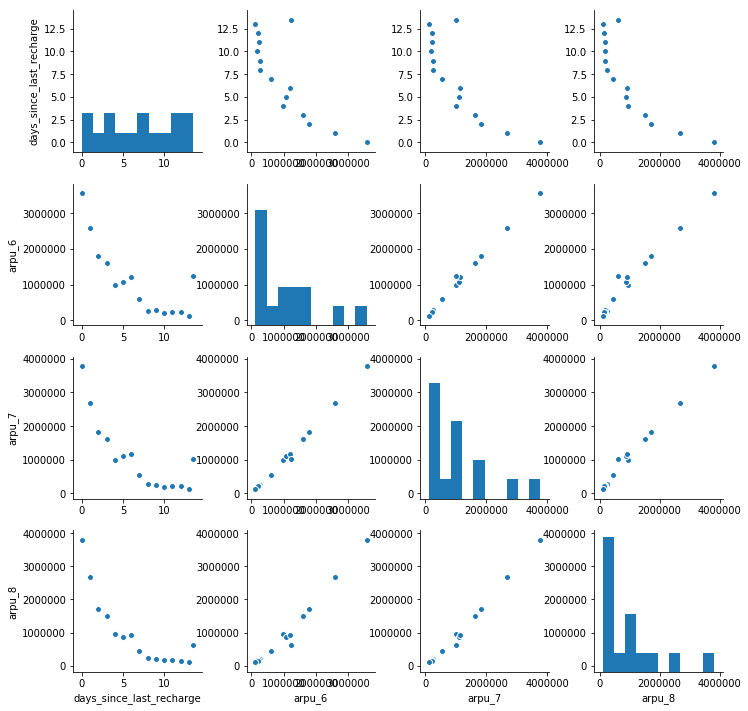

In [63]:
#Revenue From Calls
df_revenue=telecom_highvalue[['arpu_6','arpu_7','arpu_8','days_since_last_recharge']]
df_revenue_grp=df_revenue.groupby(by='days_since_last_recharge').sum()
df_revenue_grp.reset_index(inplace=True)
sns.pairplot(df_revenue_grp)

<font color=blue>From above we can see that revenue is significantly low for customers with days since last recharge greater than 5.</font>

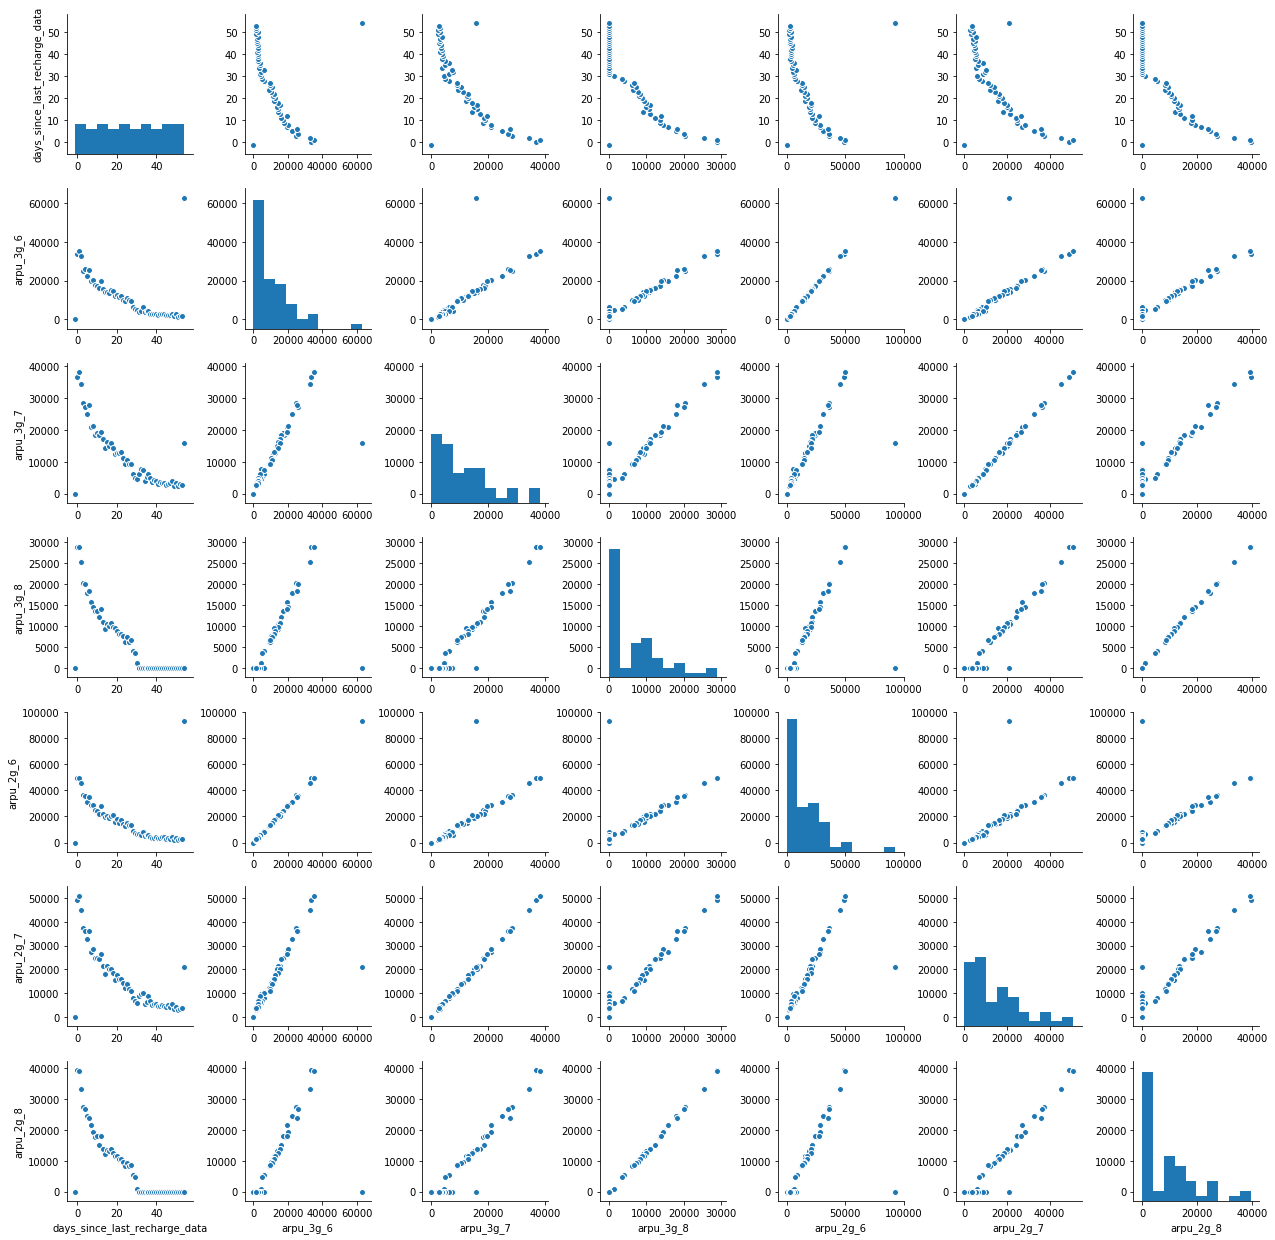

In [64]:
#Revenue From Data
df_revenue_data=telecom_highvalue[[ 'arpu_3g_6','arpu_3g_7','arpu_3g_8',
                                'arpu_2g_6','arpu_2g_7','arpu_2g_8',
                                'days_since_last_recharge_data']]
df_revenue_data_grp=df_revenue_data.groupby(by='days_since_last_recharge_data').sum()
df_revenue_data_grp.reset_index(inplace=True)
sns.pairplot(df_revenue_data_grp)

<font color=blue>From above we can see that arpu is significantly low for customers with days since last recharge data greater than 25.</font>

<b>4. Impact of years on network on churn:</b></font>

In [65]:
df_yon = telecom_highvalue[['aon', 'churn']]
df_yon['years_on_network']=df_yon['aon']/365 # Deriving new Variable for analysis converting days to years

df_yon['years_on_network']=df_yon['years_on_network'].apply(lambda x: round(x*2)/2) #rounding to near 0.5 Years

# df_yon.drop(['days_since_last_recharge'],axis=1, inplace=True)


C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


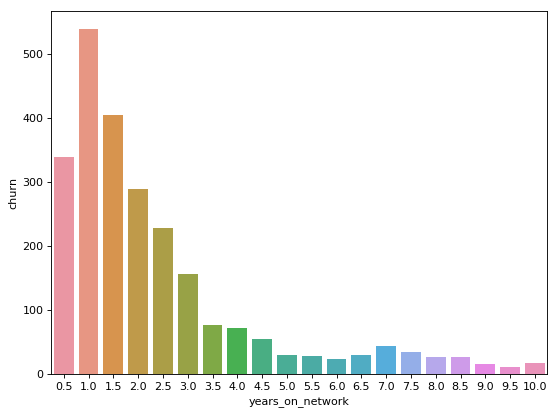

In [66]:
#analysing Years on Network with respect to churned customer
df_yon_churn=df_yon[df_yon.churn==1]
df_yon_churn_grp=df_yon_churn.groupby('years_on_network').sum()
df_yon_churn_grp.reset_index(inplace=True)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='years_on_network',y='churn',data=df_yon_churn_grp)


In [67]:
# Finding  Number of CHurns in first 4 Years compare to 10 Years
n_churns_4Years=df_yon_churn_grp[df_yon_churn_grp.years_on_network<4]['churn'].sum()
print('Churning within 4 Years:',n_churns_4Years)

n_churns_4Beyond=df_yon_churn_grp[df_yon_churn_grp.years_on_network>=4]['churn'].sum()
print('Churning beyond 4 Years:',n_churns_4Beyond)
print('Overall percentage Contribution of churning in first 4 Years: ',100*(n_churns_4Years/(n_churns_4Years+n_churns_4Beyond)))

Churning within 4 Years: 2033
Churning beyond 4 Years: 408
Overall percentage Contribution of churning in first 4 Years:  83.2855387136


<font color=blue> From above we can state that the maximum number of churner are from 1st year of service itself where as after 4th Year the churn drastically reduces.</font>

# Part 5: Data Modelling and Evaluation
1. Standardise/scale data
2. PCA - convert features to PCA components
3. Models on PCA components
    - a. Logistic Regression on PCA components
    - b. SVM on PCA components
4. Models on Standardized data (Non-PCA)
    - a. Random Forest
    - b. AdaBoost

<b>1. Standardise/scale data:</b>

<font color=blue>Churn Rate</font>

In [68]:
telecom_highvalue['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [69]:
churn = (sum(telecom_highvalue['churn'])/len(telecom_highvalue['churn'].index))*100
churn

8.1363954534848837

<font color=blue>We will standardise all variables by scaling</font>

In [70]:
# Need not scale mobile_number and churn columns
nonscaling_cols=telecom_highvalue[['mobile_number','churn']]

In [71]:
# Drop churn and mobile_number as they arent to be scaled
telecom_highvalue = telecom_highvalue.drop(['mobile_number','churn'],axis=1)

In [72]:
# Scaling using standard scaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
norm_df = standard_scaler.fit_transform(telecom_highvalue)

In [73]:
# Create a dataframe of normalised/scaled variables
df = pd.DataFrame(norm_df, index=telecom_highvalue.index, columns=telecom_highvalue.columns)

In [74]:
# Concat the churn and mobile number
df= pd.concat([df,nonscaling_cols],axis=1)

<b>2. PCA - convert features to PCA components:</b>
- Split data in test and train data.
- Run PCA
- Use screeplot and identify number of principal components required for 90% of the variance in the dataset
- Run PCA to with 90 percent variance cutoff
- Transform features to PCA components which will be used as input to train models

<font color=blue>Splitting Data into Training and Test Sets</font>

In [75]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = df['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [77]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [78]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

<font color=blue>We'll plot original features on the first 2 principal components as axes</font>

In [79]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.096238,0.077221
1,arpu_7,0.104384,0.079405
2,arpu_8,0.087154,0.099267
3,onnet_mou_6,0.118940,-0.009655
4,onnet_mou_7,0.124770,-0.010468


<font color=blue>Looking at the screeplot to assess the number of needed principal components</font>

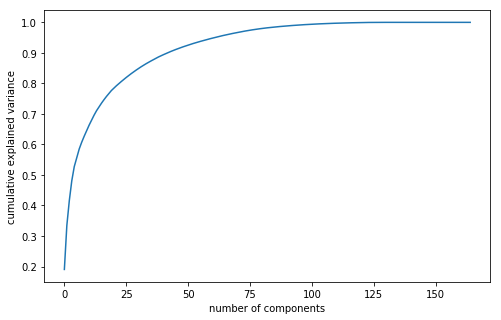

In [80]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

 <font color=blue>Looks like 60 components are enough to describe 95% of the variance in the dataset</font>    

<font color=blue>Let PCA select the number of components based on a variance cutoff we provide</font>

In [81]:
pca_again = PCA(0.90)

 <font color=blue>Basis transformation - getting the data onto our PCs</font> 

In [82]:
df_train_pca2 = pca_again.fit_transform(X_train)
print(df_train_pca2.shape)
# we see that PCA selected more than 40 components
#Applying selected components to the test data 
df_test_pca2 = pca_again.transform(X_test)
print(df_test_pca2.shape)

(21000, 43)
(9001, 43)


<b>3. Models on PCA components:</b>
- a. Logistic Regression on PCA components
- b. SVM on PCA components

<b>a. Logistic Regression on PCA components:</b>
- Applying a logistic regression on our Principal Components
- Hyperparameter Tuning Using Grid Search for Logistic regression
- Build model on optimal parameters
- Evaluate model with sensitivity and ROCAUC

In [83]:
# Create logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Estimator with default parameters and class weight = balanced to handle class imbalance
learner_pca2 = LogisticRegression(class_weight='balanced')

#Training the model on the train data
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

#Making prediction on the test data 
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
print("We see the ROC_AUC on test data={:2.2f} which is high".format(metrics.roc_auc_score(y_test, pred_probs_test2)))

We see the ROC_AUC on test data=0.91 which is high


<font color=blue>Lets do the Hyperparameter Tuning Using Grid Search for Logistic regression.<br/><br/>

We shall try l2 regularization with parameter 'C' to reduce overfitting. The parameter C is the the inverse of regularization strength in Logistic Regression.For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which implies the model is allowed to increase it's complexity, and therefore, overfit the data.<br/><br/>

There is a way to check which C values are best. The idea is to understand how each C value affects the accuracy of the training set and the testing set. Remember that our goal is always to create a model that can generalise to unseen data. So we shall use GridSearchCV and try different values of 'C' by scoring on 'accuracy'</font>

In [84]:
from sklearn.model_selection import GridSearchCV
# list of parameters 'C' to tune
params = {'C': [0.001,0.01,0.1,1,1.5,2.5,3,5],'penalty' :['l2']}
# Instantiate: Creates an instance of the estimator class
clf = LogisticRegression(class_weight='balanced')
# cross validation to measure the score of choosen metric(accuracy here) on the train data
folds = 5
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = params,
                        scoring =  'recall',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
#Fit: The instance of the estimator learns from the data, creating a parametrised model
model_cv.fit(df_train_pca2,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    7.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2.5, 3, 5], 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [85]:
# View the results of Cross validation
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.180318,0.001795,0.864567,0.866203,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",1,0.882006,0.863905,...,0.855030,0.866962,0.857988,0.869180,0.881657,0.866962,0.015288,0.000746,0.014625,0.002006
1,0.169746,0.001596,0.829080,0.835600,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",2,0.855457,0.835059,...,0.798817,0.836659,0.828402,0.839616,0.849112,0.832964,0.004652,0.000489,0.021226,0.002370
2,0.176530,0.001595,0.820801,0.829834,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",3,0.846608,0.826923,...,0.786982,0.833703,0.819527,0.832225,0.840237,0.827051,0.003396,0.000488,0.021411,0.002728
3,0.184111,0.001793,0.820801,0.829391,1,l2,"{'C': 1, 'penalty': 'l2'}",3,0.846608,0.826923,...,0.786982,0.833703,0.819527,0.831486,0.840237,0.827051,0.017564,0.000403,0.021411,0.002724
4,0.173935,0.001795,0.820801,0.829391,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",3,0.846608,0.826923,...,0.786982,0.833703,0.819527,0.831486,0.840237,0.827051,0.004787,0.000399,0.021411,0.002724


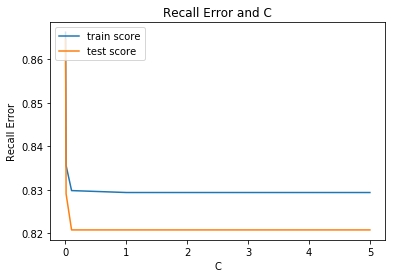

In [86]:
# plotting mean test and train scores with parameter 'C' 
# cv_results['param_C'] = cv_results['param_C'].astype('int32')
# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Recall Error')
plt.title("Recall Error and C")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<font color=blue>Lets do the Hyperparameter Tuning Using Grid Search for Logistic regression</font>

In [87]:
# View best hyperparameters
print('Best Penalty:', model_cv.best_estimator_.get_params()['penalty'])
print('Best C:', model_cv.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.001


<font color=blue>small C values will increase the regularization strenght which implies the creation of simple models that tend to underfit the data. By using bigger C values, the model can increase it's complexity and adjust better to the data. So we choose that C which offers the smallest difference between the training and testing accuracy (remember we want to generalise our model to unseen data)</font>

In [88]:
# with best value of 'c'
c =5
# Instantiate the classifier
model_cv_C = LogisticRegression(C=model_cv.best_estimator_.get_params()['C'],class_weight='balanced',penalty='l2')
# Fit the model      
model_cv_C.fit(df_train_pca2,y_train)
#Making prediction on the test data with tunned model and check the roc_auc metrics score
pred_probs_test2 = model_cv_C.predict_proba(df_test_pca2)[:,1]
print("We see the ROC_AUC on test data after tuning={:2.2f} which is high".format(metrics.roc_auc_score(y_test, pred_probs_test2)))

We see the ROC_AUC on test data after tuning=0.91 which is high


<font color=blue>We see the roc_auc_score remain same before and after tunning</font>

<font color=blue>Let's decide the Churn Probability for making the Churn predictions</font>

In [89]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test2)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]
# Let's see the head
print(y_pred_1.head())
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting ID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','churn_Prob'], axis=1)
# Let's see the head of y_pred_final
print(y_pred_final.head())

          0
0  0.841106
1  0.494599
2  0.168137
3  0.404925
4  0.841852
      ID  churn  churn_Prob
0  20296      1    0.841106
1   8279      1    0.494599
2  72269      0    0.168137
3  65602      0    0.404925
4  42758      1    0.841852


<font color=blue>Lets find the Optimal cutoff probability that will maximise the sensitivity</font>

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,ID,churn,churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,20296,1,0.841106,1,1,1,1,1,1,1,1,1,0
1,8279,1,0.494599,1,1,1,1,1,0,0,0,0,0
2,72269,0,0.168137,1,1,0,0,0,0,0,0,0,0
3,65602,0,0.404925,1,1,1,1,1,0,0,0,0,0
4,42758,1,0.841852,1,1,1,1,1,1,1,1,1,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci = cm1[0,0]/(cm1[0,1]+cm1[0,0])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  1.000000  0.000000
0.1   0.1  0.248639  0.993333  0.180948
0.2   0.2  0.454283  0.978667  0.406617
0.3   0.3  0.605155  0.956000  0.573264
0.4   0.4  0.720364  0.906667  0.703430
0.5   0.5  0.807355  0.861333  0.802448
0.6   0.6  0.865237  0.802667  0.870925
0.7   0.7  0.903677  0.718667  0.920494
0.8   0.8  0.926675  0.602667  0.956127
0.9   0.9  0.931008  0.338667  0.984850


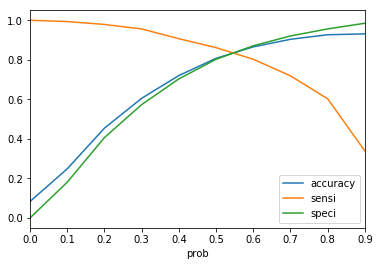

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

<font color=blue>From the curve above, 0.4 is the optimum point to take it as a cutoff probability as it yields maximum Sensitivity and beyond the 0.4 point the accuracy and specificity remain almost constant as seen above </font>

In [93]:
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,ID,churn,churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,20296,1,0.841106,1,1,1,1,1,1,1,1,1,0,1
1,8279,1,0.494599,1,1,1,1,1,0,0,0,0,0,1
2,72269,0,0.168137,1,1,0,0,0,0,0,0,0,0,0
3,65602,0,0.404925,1,1,1,1,1,0,0,0,0,0,1
4,42758,1,0.841852,1,1,1,1,1,1,1,1,1,0,1


In [94]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final['churn'], y_pred_final['final_predicted'])
print(confusion)
#Let's check the overall accuracy.
print("We see the Accuracy on test data={:2.2f} which is high".format(metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)))

[[5804 2447]
 [  70  680]]
We see the Accuracy on test data=0.72 which is high


In [95]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [96]:
# Let's see the sensitivity of our SVM model
sensitivity_LR = TP / float(FN + TP)
print("sensitivity_LR",sensitivity_LR)

sensitivity_LR 0.906666666667


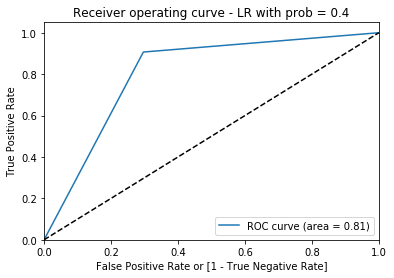

(array([ 0.        ,  0.29657011,  1.        ]),
 array([ 0.        ,  0.90666667,  1.        ]),
 array([2, 1, 0], dtype=int64))

In [97]:
def draw_roc( actual, probs, plot_title='Receiver operating characteristic'):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title(plot_title)
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_pred_final.churn, y_pred_final.final_predicted, plot_title='Receiver operating curve - LR with prob = 0.4')

<font color=blue> With prob. cutoff > 0.4 the AUC is 83%. </font>

<b>b. SVM on PCA components:</b>
- Grid Search to Find Optimal Hyperparameter C
- Build model on optimal parameter
- Evaluate model with sensitivity and ROCAUC

In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

<font color=blue>Grid Search to Find Optimal Hyperparameter C</font>

<font color='red'><b>Note: Below step takes 7-8 mins to run</b></font>

In [99]:
%%time
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

# handling class imbalance in model
model = SVC(class_weight='balanced')

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_pca_svm = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

# fit the model
model_pca_svm.fit(df_train_pca2,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.9min finished


Wall time: 4min 20s


In [100]:
# cv results
cv_results = pd.DataFrame(model_pca_svm.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,10.891548,3.140275,0.730487,0.846329,0.1,{'C': 0.1},1,0.717626,0.852863,0.726766,0.836947,0.747069,0.849177,0.136820,0.140237,0.012305,0.006803
1,6.724363,2.035538,0.667922,0.997053,1,{'C': 1},2,0.652878,0.998238,0.669145,0.995663,0.681742,0.997258,0.066398,0.064625,0.011816,0.001061
2,9.255261,1.706123,0.470925,1.000000,10,{'C': 10},3,0.458633,1.000000,0.485130,1.000000,0.469012,1.000000,0.363401,0.042515,0.010902,0.000000
3,10.156213,1.644262,0.417788,1.000000,100,{'C': 100},5,0.383094,1.000000,0.433086,1.000000,0.437186,1.000000,0.381542,0.018015,0.024590,0.000000
4,10.826386,1.647283,0.418327,1.000000,1000,{'C': 1000},4,0.384892,1.000000,0.431227,1.000000,0.438861,1.000000,0.844466,0.031241,0.023846,0.000000


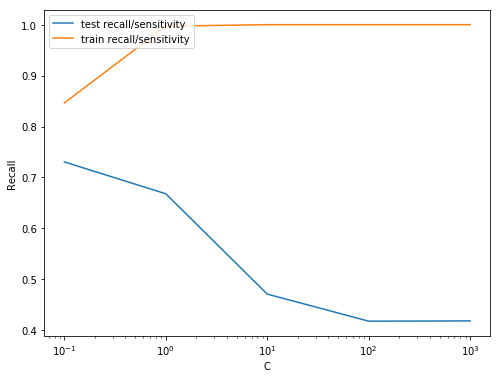

In [101]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall/sensitivity', 'train recall/sensitivity'], loc='upper left')
plt.xscale('log')

In [102]:
# printing the optimal accuracy score and hyperparameters
best_score = model_pca_svm.best_score_
best_C = model_pca_svm.best_params_['C']

print(" The highest test recall is {0} at C = {1}".format(best_score, best_C))

 The highest test recall is 0.7304867917513329 at C = 0.1


<font color="blue">Building and Evaluating Model with optimal hyperparameters</font>

In [103]:
%%time
# model with the best value of C
model = SVC(C=best_C, class_weight='balanced')

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

Wall time: 1min 19s


In [104]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))


accuracy 0.882568603489
precision 0.399079552926
recall 0.809333333333


In [105]:
confusion_Bal_SVM = metrics.confusion_matrix(y_test, y_pred)
print(confusion_Bal_SVM)
#[row, column]
TN = confusion_Bal_SVM[0, 0]
FP = confusion_Bal_SVM[0, 1]
FN = confusion_Bal_SVM[1, 0]
TP = confusion_Bal_SVM[1, 1]

[[7337  914]
 [ 143  607]]


In [106]:
# Let's see the sensitivity of our SVM model
sensitivity_SVM = TP / float(FN + TP)
print("sensitivity_SVM",sensitivity_SVM)

sensitivity_SVM 0.809333333333


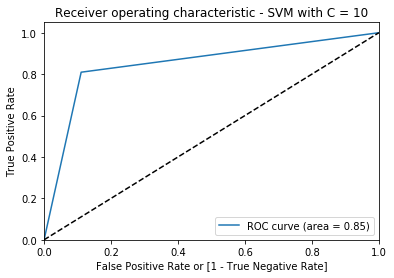

(array([ 0.        ,  0.11077445,  1.        ]),
 array([ 0.        ,  0.80933333,  1.        ]),
 array([2, 1, 0]))

In [107]:
draw_roc(y_test, y_pred, plot_title='Receiver operating characteristic - SVM with C = 10')

<font color="blue"><b>Model metric comparison:</b><br/> As it is more important to identify churners than the non-churners accurately we are choosing evaluation metric as sensitivity.</font>

In [108]:
print ("Support vector machines:")
print ("Sensitivity: %.3f" % sensitivity_SVM)
print ("Logistic Regression:")
print ("Sensitivity: %.3f" % sensitivity_LR)

Support vector machines:
Sensitivity: 0.809
Logistic Regression:
Sensitivity: 0.907


<font color="blue"><b> From comparison we see that Logistic regression model gives better performance in terms of sensitivity metric. So Logistic regression model is preferred for making predictions on Telecom churn data. </b></font>

#### We shall now look at Non-PCA approach to build models and identify important variables and build models.

<b>4. Models on Standardized data (Non-PCA)</b>
- a. Train and test data creation to be used by all models
- b. Random Forest
- c. AdaBoost

<b>a. Train and test data creation to be used by all models:</b>

In [109]:
# Dataframe with scaled variables and train/test split created earlier
df.shape

(30001, 167)

In [110]:
print(df.head())

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  -1.078702 -1.027572 -0.797500    -0.825960    -0.822172    -0.807941   
7   1.722804  2.401412  2.443266    -0.580246    -0.592775    -0.544983   
8  -0.495981 -0.135436 -1.024208     0.931467     0.650491    -0.631529   
21 -0.059807  0.203946  0.459869    -0.390905    -0.267936    -0.379786   
23 -1.474074 -1.094847 -0.343250    -0.617969    -0.609640    -0.639073   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...    \
0      -1.011345     -0.999641     -0.952084            0.0  ...     
7       0.370456      0.693614      0.109121            0.0  ...     
8      -0.722875     -0.758920     -0.507688            0.0  ...     
21      1.298403      1.677395      2.249962            0.0  ...     
23     -0.751063     -0.732857     -0.281680            0.0  ...     

    ratio_og_ic_7  ratio_og_ic_8  ratio_loc_std_og_6  ratio_loc_std_og_7  \
0       -0.340221      -0.998764           -0.614065

In [111]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = df['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

print(X_train.shape)
print(X_test.shape)

(21000, 165)
(9001, 165)


In [112]:
# Dataframe with scaled variables and train/test split created earlier
df.shape

(30001, 167)

In [113]:
print(df.head())

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  -1.078702 -1.027572 -0.797500    -0.825960    -0.822172    -0.807941   
7   1.722804  2.401412  2.443266    -0.580246    -0.592775    -0.544983   
8  -0.495981 -0.135436 -1.024208     0.931467     0.650491    -0.631529   
21 -0.059807  0.203946  0.459869    -0.390905    -0.267936    -0.379786   
23 -1.474074 -1.094847 -0.343250    -0.617969    -0.609640    -0.639073   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...    \
0      -1.011345     -0.999641     -0.952084            0.0  ...     
7       0.370456      0.693614      0.109121            0.0  ...     
8      -0.722875     -0.758920     -0.507688            0.0  ...     
21      1.298403      1.677395      2.249962            0.0  ...     
23     -0.751063     -0.732857     -0.281680            0.0  ...     

    ratio_og_ic_7  ratio_og_ic_8  ratio_loc_std_og_6  ratio_loc_std_og_7  \
0       -0.340221      -0.998764           -0.614065

<font color=blue>Train test Split</font>

In [114]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = df['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

print(X_train.shape)
print(X_test.shape)

(21000, 165)
(9001, 165)


<b>b. Random Forest:</b>
- Feature ranking with recursive feature elimination and cross-validation: RFECV
- Hyper parameters Tunning to find Optimal features
- Build model on optimal parameters
- Evaluate model with sensitivity and ROCAUC
- Important predictor attributes from RFECV

<font color=blue><b>Feature ranking with recursive feature elimination and cross-validation: RFECV</b><br/>
There are 165 features which will make modelling complex hence lets try to reduce the dimensions by using RFECV to find optimal dimesnions based on Random Forest Classifier </font>

 <font color=blue>Lets try RFECV applied on Random Forest with scoring as Sensitivity/recall</font>

In [115]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
# Create the RFE object and compute a cross-validated score.
# The "Recall" scoring is proportional to the number of correct classifications
# n_jobs= 4 tells the RFE search to run 4 jobs in parallel
# step=5 specifies how many features are removed at a time
# The "recall" scoring is proportional to the number of correct classifications
# Class_weight = balanced to lower impact of imbalanced dataset
rfecv = RFECV(estimator=RandomForestClassifier(class_weight='balanced',max_depth=5, n_jobs=-1), step=5, cv=2, scoring='recall',verbose=2)
rfecv.fit(X, y)
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Fitting estimator with 165 features.
Fitting estimator with 160 features.
Fitting estimator with 155 features.
Fitting estimator with 150 features.
Fitting estimator with 145 features.
Fitting estimator with 140 features.
Fitting estimator with 135 features.
Fitting estimator with 130 features.
Fitting estimator with 125 features.
Fitting estimator with 120 features.
Fitting estimator with 115 features.
Fitting estimator with 110 features.
Fitting estimator with 105 features.
Fitting estimator with 100 features.
Fitting estimator with 95 features.
Fitting estimator with 90 features.
Fitting estimator with 85 features.
Fitting estimator with 80 features.
Fitting estimator with 75 features.
Fitting estimator with 70 features.
Fitting estimator with 65 features.
Fitting estimator with 60 features.
Fitting estimator with 55 features.
Fitting estimator with 50 features.
Fitting estimator with 45 features.
Fitting estimator with 40 features.
Fitting estimator with 35 features.
Fitting estima

 <font color=blue>Plot number of features VS. cross-validation scores</font>

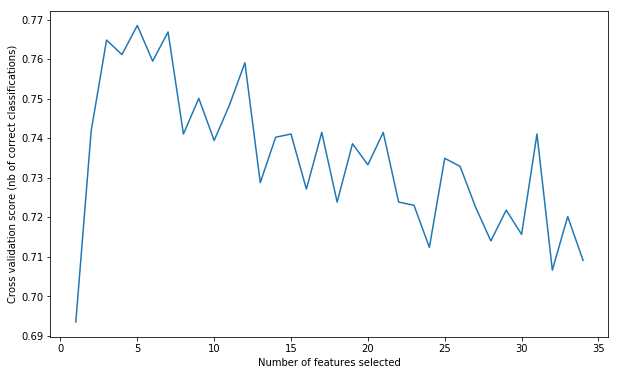

In [116]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

<font color=blue>We saw that 10 features are selected with max_depth = 5. Let's tune further with max_depth = 10, n_estimators = 100, max_features as sqrt of n_features, min_samples_leaf as 100 and min_samples_split around 100</font>

<font color=blue><b>Hyper parameters Tuning to find Optimal features</b></font>

<font color=blue>
Let's tune further with max_depth = 10, n_estimators = 100, max_features as sqrt of n_features, min_samples_leaf as 100 and min_samples_split around 100</font>

<font color='red'><b>Note: RFECV runs for around 7 mins for 2 folds Cross Validation and step size 5.</b></font>

In [117]:
%%time
# RFECV search to find optimal parameters
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
# Create the RFE object and compute a cross-validated score.
# max_features=sqrt(n_features) (same as “auto”)
# max_depth is maximum depth of the tree impacts overall accuracy of the ensemble, 
# we'll specify an appropriately low value of max_depth, so that the trees do not overfit. 
# n_estimators is number of trees in the forest 
rfecv = RFECV(estimator=RandomForestClassifier(class_weight='balanced',n_estimators=100, max_features='sqrt',
                                               max_depth=10,min_samples_leaf = 100 , min_samples_split = 100, n_jobs=-1), step=5, cv=2, scoring='recall',verbose=2)
rfecv.fit(X, y)
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Fitting estimator with 165 features.
Fitting estimator with 160 features.
Fitting estimator with 155 features.
Fitting estimator with 150 features.
Fitting estimator with 145 features.
Fitting estimator with 140 features.
Fitting estimator with 135 features.
Fitting estimator with 130 features.
Fitting estimator with 125 features.
Fitting estimator with 120 features.
Fitting estimator with 115 features.
Fitting estimator with 110 features.
Fitting estimator with 105 features.
Fitting estimator with 100 features.
Fitting estimator with 95 features.
Fitting estimator with 90 features.
Fitting estimator with 85 features.
Fitting estimator with 80 features.
Fitting estimator with 75 features.
Fitting estimator with 70 features.
Fitting estimator with 65 features.
Fitting estimator with 60 features.
Fitting estimator with 55 features.
Fitting estimator with 50 features.
Fitting estimator with 45 features.
Fitting estimator with 40 features.
Fitting estimator with 35 features.
Fitting estima

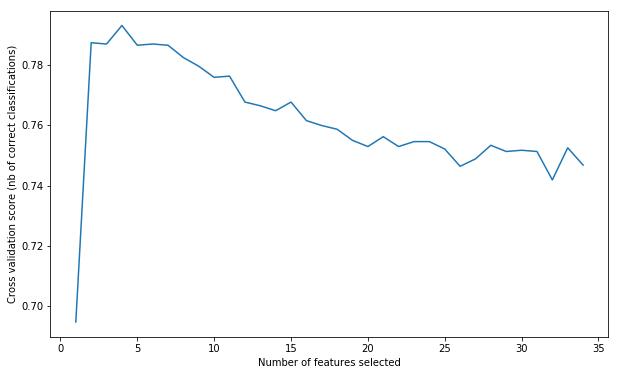

In [118]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

<font color=blue><b>Important predictor attributes from RFECV are below</b></font>

In [119]:
predictors = X.columns[rfecv.support_]
print(predictors)

Index(['arpu_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'av_rech_amt_data_8',
       'fb_user_8', 'days_since_last_recharge'],
      dtype='object')


<font color=blue><b>These are the important variable identifed for churn.</b></font>

<font color=blue>Lets model the above 10 variables with Randon Forest Classifier</font>

<font color=blue><b>Grid Search to Find Optimal Hyperparameters</b></font><br/>
<font color=blue>We can now find the optimal hyperparameters using GridSearchCV for Random Forest Classifier.</font>

In [120]:
# Create the parameter grid based on the results of random search : Instantiate
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = 4,verbose = 2)

<font color=red><b>Note: GridSearchCV runs for around 6 mins to fit with parameters for 2 folds Cross Validation <b></font>

In [121]:
%%time
# Fit the grid search to the data: Fit
grid_search.fit(X_train[predictors], y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   30.7s
[Parallel(n_jobs=4)]: Done 144 out of 144 | elapsed:  2.8min finished


Wall time: 2min 57s


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [122]:
# printing the optimal accuracy score and hyperparameters: Score
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.94319047619 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


<font color=blue>Fitting the final model with the best parameters obtained from grid search.</font>

In [123]:
best_param_grid= grid_search.best_params_
print(best_param_grid)

{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [124]:
# model with the best hyperparameters:
from sklearn.ensemble import RandomForestClassifier
rfc_tuned = RandomForestClassifier(bootstrap=True,
                             max_depth=best_param_grid['max_depth'],
                             min_samples_leaf=best_param_grid['min_samples_leaf'],
                             min_samples_split=best_param_grid['min_samples_split'],
                             max_features=best_param_grid['max_features'],
                             n_estimators=best_param_grid['n_estimators'])

In [125]:
# fit
rfc_tuned.fit(X_train[predictors],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
# predict
predictions_RF_tuned = rfc_tuned.predict(X_test[predictors])

In [127]:
from sklearn import metrics
#Let's check the overall accuracy.
metrics.accuracy_score( y_test, predictions_RF_tuned)

0.9431174313965115

In [128]:
# Printing confusion matrix
confusion_RF_tuned =confusion_matrix(y_test,predictions_RF_tuned)
print(confusion_RF_tuned)
#[row, column]
TN = confusion_RF_tuned[0, 0]
FP = confusion_RF_tuned[0, 1]
FN = confusion_RF_tuned[1, 0]
TP = confusion_RF_tuned[1, 1]

[[8124  127]
 [ 385  365]]


In [129]:
# Let's see the sensitivity of our logistic regression model
sensitivity_RF_tuned = TP / float(FN + TP)
print("sensitivity_RF_tuned",sensitivity_RF_tuned)

sensitivity_RF_tuned 0.486666666667


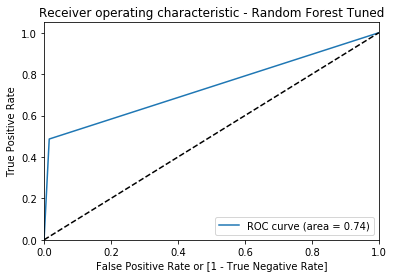

(array([ 0.        ,  0.01539207,  1.        ]),
 array([ 0.        ,  0.48666667,  1.        ]),
 array([2, 1, 0]))

In [130]:
draw_roc(y_test, predictions_RF_tuned, 'Receiver operating characteristic - Random Forest Tuned')

<b>c. ADABoost:</b>
- Build model
- Evaluate model with sensitivity and ROCAUC

In [131]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=200,
    learning_rate=1.5,
    algorithm="SAMME")

In [132]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.5, n_estimators=200, random_state=None)

In [133]:
# predictions
# the second column represents the probability of a churn
predictions = adaboost_model_1.predict_proba(X_test)
predictions[:10]

array([[ 0.51470693,  0.48529307],
       [ 0.50536126,  0.49463874],
       [ 0.52215468,  0.47784532],
       [ 0.51745695,  0.48254305],
       [ 0.50218553,  0.49781447],
       [ 0.5247826 ,  0.4752174 ],
       [ 0.52236004,  0.47763996],
       [ 0.53061155,  0.46938845],
       [ 0.51037302,  0.48962698],
       [ 0.51765206,  0.48234794]])

In [134]:
# roc auc
metrics.roc_auc_score(y_test, predictions[:, 1])

0.90424821233789843

In [135]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(predictions)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting ID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','churn','churn_Prob'], axis=1)
# Creating new column 'predicted' with 1 if Churn_Prob>0.2 else 0
y_pred_final['predicted'] = y_pred_final['churn_Prob'].map( lambda x: 1 if x > 0.25 else 0)
# Let's see the head of y_pred_final
y_pred_final.head()
#sns.distplot(round(y_pred_final.churn_Prob,1))

,ID,churn,churn_Prob,predicted
0,20296,1,0.514707,1
1,8279,1,0.505361,1
2,72269,0,0.522155,1
3,65602,0,0.517457,1
4,42758,1,0.502186,1


In [136]:
from sklearn import metrics
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.predicted)

0.083324075102766362

In [137]:
confusion_Ada = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted)
print(confusion_Ada)
#[row, column]
TN = confusion_Ada[0, 0]
FP = confusion_Ada[0, 1]
FN = confusion_Ada[1, 0]
TP = confusion_Ada[1, 1]

# Let's see the sensitivity of our logistic regression model
sensitivity_ada = TP / float(FN + TP)
print("confusion_Ada Sensitivity",sensitivity_ada)

[[   0 8251]
 [   0  750]]
confusion_Ada Sensitivity 1.0


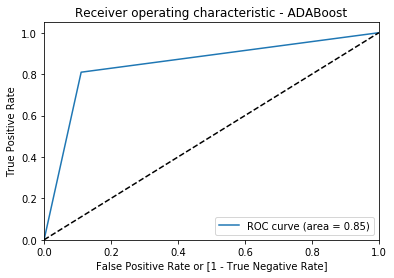

(array([ 0.        ,  0.11077445,  1.        ]),
 array([ 0.        ,  0.80933333,  1.        ]),
 array([2, 1, 0]))

In [138]:
draw_roc(y_test, y_pred, plot_title='Receiver operating characteristic - ADABoost')

# Part 5: Visualize important features and recommend strategies to manage customer churn
- <b>1. Create bins and churn rate columns for important predictors and plotting churn rate for important predictors:</b>
    - <b>a. Outgoing minutes of usage features:</b>
        - 'loc_og_t2m_mou_8'
        - 'loc_og_mou_8'
        - 'total_og_mou_8'

    - <b>b. Incoming minutes of usage features:</b>
        - 'loc_ic_t2t_mou_8'
        - 'loc_ic_t2m_mou_8'
        - 'loc_ic_mou_8'
        - 'total_ic_mou_8'

    - <b>c. Days since last recharge:</b>
        - 'days_since_last_recharge'

    - <b>d. Recharge amount features:</b>
        - 'last_day_rch_amt_8'
        - 'av_rech_amt_data_8'

<font color=blue><b>We will analyse the above important variables identified via RFECV using Random classifier.</b></font>

In [139]:
print(predictors)

Index(['arpu_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'av_rech_amt_data_8',
       'fb_user_8', 'days_since_last_recharge'],
      dtype='object')


In [140]:
# Concat the churn and mobile number
telecom_highvalue= pd.concat([telecom_highvalue,nonscaling_cols],axis=1)

<b>1. Create bins and churn rate columns for important predictors and plotting churn rate for important predictors:</b>

<font color=blue>Let's create bins for the important predictors and plot them against churn rate to observe their impct on customer churn</font>

<font color=blue>Let's observe the distribution of the important predictors to create bins</font>

In [141]:
telecom_highvalue[['loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8',
                   'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
                   'total_ic_mou_8', 'days_since_last_recharge', 'last_day_rch_amt_8',
                   'av_rech_amt_data_8', 'churn']].describe([.2, .3, .4, .5, .6, .7, .8, .9, .99])

,loc_og_t2m_mou_8,loc_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,total_ic_mou_8,days_since_last_recharge,last_day_rch_amt_8,av_rech_amt_data_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,128.910847,202.558953,507.272914,43.286048,125.239369,194.520548,248.006776,4.074114,82.446352,110.065144,0.081364
std,147.036173,227.622724,527.748815,49.313868,128.229776,194.771930,237.479930,4.143700,88.640419,143.615815,0.273398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,6.430000,11.590000,38.990000,2.600000,15.440000,27.510000,43.180000,0.000000,0.000000,0.000000,0.000000
30%,20.760000,34.380000,113.390000,7.510000,33.410000,54.880000,81.080000,1.000000,17.000000,0.000000,0.000000
40%,40.510000,66.230000,214.210000,14.030000,54.330000,87.410000,124.340000,2.000000,30.000000,0.000000,0.000000
50%,67.760000,110.810000,333.540000,22.610000,80.040000,128.730000,173.110000,3.000000,50.000000,25.000000,0.000000
60%,106.140000,171.460000,473.910000,34.730000,112.840000,179.210000,234.660000,4.000000,98.000000,100.000000,0.000000
70%,160.310000,255.910000,659.890000,52.640000,157.830000,244.530000,309.560000,5.000000,130.000000,154.000000,0.000000


In [142]:
def plot_churn_rate(churn_rate_column, bin_column):
    df=telecom_highvalue.groupby([bin_column])['churn'].value_counts(normalize=True).reset_index(name='percentage')
    mapval=df[(df.churn==1)].set_index(bin_column)[['percentage']].to_dict().get('percentage', "")
    telecom_highvalue.loc[:,churn_rate_column] = telecom_highvalue[bin_column].map(mapval)
    sns.barplot(x=bin_column,y=churn_rate_column,data=telecom_highvalue)

<b>a. Outgoing minutes of usage features:</b>
        - 'loc_og_t2m_mou_8'
        - 'loc_og_mou_8'
        - 'total_og_mou_8'

In [143]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 10, 60, 100, 150, 300, 400, 500]
# Define the lables
bucket = ['0-10', '10-60', '60-100', '100-150', '150-300', '300-400','Above 400']
# Using the cut function lets create the bins
telecom_highvalue['loc_og_t2m_mou_8_bins'] = pd.cut(telecom_highvalue['loc_og_t2m_mou_8'], bins=cutpoints,labels=bucket)  

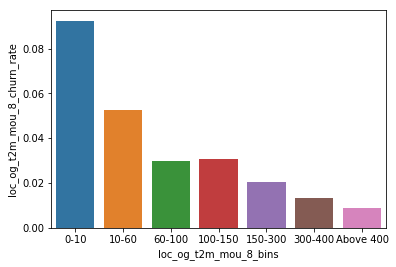

In [144]:
plot_churn_rate('loc_og_t2m_mou_8_churn_rate','loc_og_t2m_mou_8_bins')

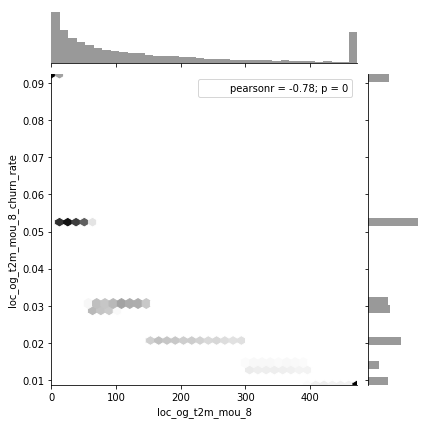

In [172]:
df=telecom_highvalue.groupby(['loc_og_t2m_mou_8'])['churn'].value_counts(normalize=True).reset_index(name='percentage')
mapval=df[(df.churn==1)].set_index('loc_og_t2m_mou_8')[['percentage']].to_dict().get('percentage', "")
telecom_highvalue.loc[:,'loc_og_t2m_mou_8_churn_rate2'] = telecom_highvalue['loc_og_t2m_mou_8'].map(mapval)
sns.jointplot('loc_og_t2m_mou_8', 'loc_og_t2m_mou_8_churn_rate', telecom_highvalue, kind='hex', color='k')

In [145]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 30, 60, 200, 300, 400, 600, 750]
# Define the lables
bucket = ['0-30', '30-60', '60-200', '300-400', '400-600', '600-750','Above 600']
# Using the cut function lets create the bins
telecom_highvalue['loc_og_mou_8_bins'] = pd.cut(telecom_highvalue['loc_og_mou_8'], bins=cutpoints,labels=bucket) 

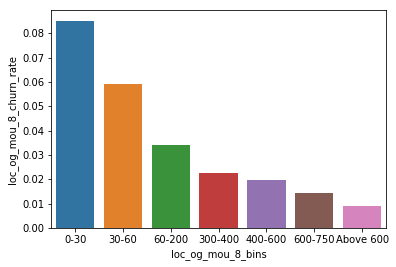

In [146]:
plot_churn_rate('loc_og_mou_8_churn_rate','loc_og_mou_8_bins')

In [147]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 30, 200, 500, 700, 1000, 1400, 1850]
# Define the lables
bucket = ['0-30', '30-200', '200-500', '500-750', '1000-1400', '1400-1700','Above 1700']
# Using the cut function lets create the bins
telecom_highvalue['total_og_mou_8_bins'] = pd.cut(telecom_highvalue['total_og_mou_8'], bins=cutpoints,labels=bucket)  

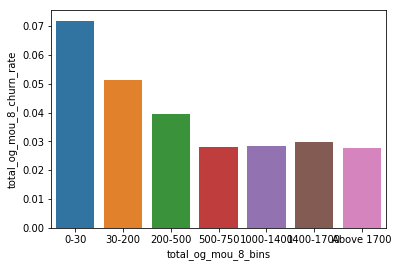

In [148]:
plot_churn_rate('total_og_mou_8_churn_rate','total_og_mou_8_bins')

<b>b. Incoming minutes of usage features:</b>
      - 'loc_ic_t2t_mou_8'
      - 'loc_ic_t2m_mou_8'
      - 'loc_ic_mou_8'
      - 'total_ic_mou_8'

In [149]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 5, 10, 20, 50, 80, 150, 200]
# Define the lables
bucket = ['0-5', '5-10', '10-20', '20-50', '50-80', '80-150','Above 100']
# Using the cut function lets create the bins
telecom_highvalue['loc_ic_t2t_mou_8_bins'] = pd.cut(telecom_highvalue['loc_ic_t2t_mou_8'], bins=cutpoints,labels=bucket)  

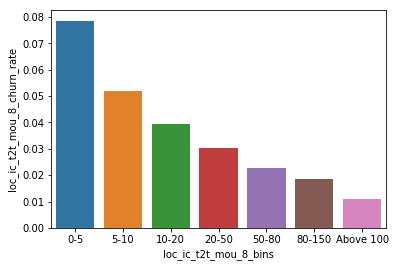

In [150]:
plot_churn_rate('loc_ic_t2t_mou_8_churn_rate','loc_ic_t2t_mou_8_bins')

In [151]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 5, 10, 20, 150, 200, 400, 500]
# Define the lables
bucket = ['0-5', '5-10', '10-20', '20-150', '150-200', '200-400','Above 400']
# Using the cut function lets create the bins
telecom_highvalue['loc_ic_t2m_mou_8_bins'] = pd.cut(telecom_highvalue['loc_ic_t2m_mou_8'], bins=cutpoints,labels=bucket)  


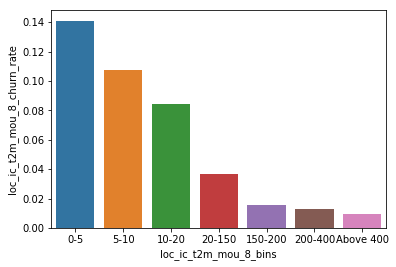

In [152]:
plot_churn_rate('loc_ic_t2m_mou_8_churn_rate','loc_ic_t2m_mou_8_bins')

In [153]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 50, 100, 200, 300, 400, 600, 700]
# Define the lables
bucket = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-600','Above 600']
# Using the cut function lets create the bins
telecom_highvalue['loc_ic_mou_8_bins'] = pd.cut(telecom_highvalue['loc_ic_mou_8'], bins=cutpoints,labels=bucket) 

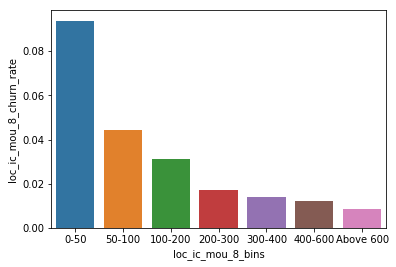

In [154]:
plot_churn_rate('loc_ic_mou_8_churn_rate','loc_ic_mou_8_bins')

In [155]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 45, 100, 250, 350, 550, 750, 850]
# Define the lables
bucket = ['0-45', '45-100', '100-250', '250-350', '350-550', '550-750','Above 750']
# Using the cut function lets create the bins
telecom_highvalue['total_ic_mou_8_inc_bins'] = pd.cut(telecom_highvalue['total_ic_mou_8'], bins=cutpoints, labels=bucket)

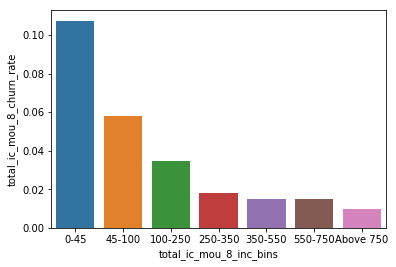

In [156]:
plot_churn_rate('total_ic_mou_8_churn_rate','total_ic_mou_8_inc_bins')

<b>c. Days since last recharge:</b>
     - 'days_since_last_recharge'

In [157]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 2, 4, 6, 8, 10, 12, 14]
# Define the lables
bucket = ['0-2', '2-4', '4-6', '6-8', '8-10','10-12','Above 12']
# Using the cut function lets create the bins
telecom_highvalue['days_since_last_rch_inc_bins'] = pd.cut(telecom_highvalue['days_since_last_recharge'], bins=cutpoints, labels=bucket)

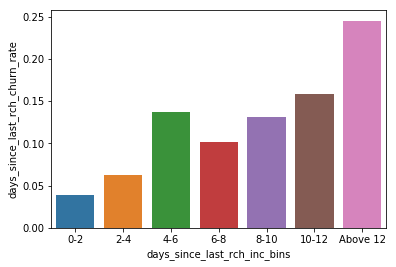

In [158]:
plot_churn_rate('days_since_last_rch_churn_rate','days_since_last_rch_inc_bins')

<b>d. Recharge amount features:</b>
      - 'last_day_rch_amt_8'
      - 'av_rech_amt_data_8'

In [159]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 20, 30, 50, 130, 150, 300, 350]
# Define the lables
bucket = ['0-20', '20-30', '30-50', '50-130', '130-150', '150-300','Above 300']
# Using the cut function lets create the bins
telecom_highvalue['last_day_rch_amt_8_bins'] = pd.cut(telecom_highvalue['last_day_rch_amt_8'], bins=cutpoints,labels=bucket)  

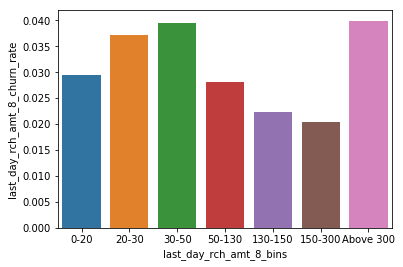

In [160]:
plot_churn_rate('last_day_rch_amt_8_churn_rate','last_day_rch_amt_8_bins')

In [161]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 30, 100, 150, 200, 300, 450, 500]
# Define the lables
bucket = ['0-30', '30-100', '100-200', '200-300', '300-450', '450-500','Above 500']
# Using the cut function lets create the bins
telecom_highvalue['av_rech_amt_data_8_bins'] = pd.cut(telecom_highvalue['av_rech_amt_data_8'], bins=cutpoints,labels=bucket)  

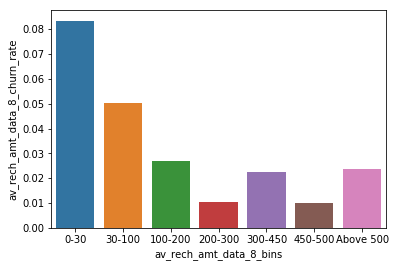

In [162]:
plot_churn_rate('av_rech_amt_data_8_churn_rate','av_rech_amt_data_8_bins')

## Inferences and Strategies to manage customer churn based:
<b>a. Outgoing minutes of usage features:</b>
   - 'loc_og_t2m_mou_8' : Customer churn rate is high for 0-60 minutes of usage and reduces with high usage.
   - 'loc_og_mou_8' : Customer churn rate is high for 0-60 minutes of usage and reduces with high usage.
   - 'total_og_mou_8' : Customer churn rate is high for 0-200 minutes of usage and reduces with high usage.
   <br/><br/>
   <b>Churn rate is high for customers with low outgoing minutes of usage indicating that customer with reduced outgoing call are likely to churn. Company should focus on users with low outgoing minutes of usage.</b>
   <br/><br/>
   
<b>b. Incoming minutes of usage features:</b>
   - 'loc_ic_t2t_mou_8' : Customer churn rate is high for 0-10 minutes of usage and reduces with high usage.
   - 'loc_ic_t2m_mou_8' : Customer churn rate is high for 0-20 minutes of usage and reduces with high usage.
   - 'loc_ic_mou_8' : Customer churn rate is high for 0-100 minutes of usage and reduces with high usage.
   - 'total_ic_mou_8' : Customer churn rate is high for 0-100 minutes of usage and reduces with high usage.
   <br/><br/>
   <b>Churn rate is high for customers with low incoming minutes of usage indicating that customer with reduced incoming call are likely to churn. Company should focus on users with low incoming minutes of usage.</b>
   <br/><br/>
   
<b>c. Days since last recharge:</b>
   - 'days_since_last_recharge' : Customer churn rate is high for days since last recharge above 10.
   <br/><br/>
   <b>Churn rate is high for customers who have not recharged since  indicating that customers who have not recharges since days are more likely to churn. 
    Company should focus on users with low outgoing minutes of usage.</b>
    <br/><br/>
    
<b>d. Recharge amount features:</b>
   - 'last_day_rch_amt_8' : In the lower bracked customer churn rate is higher between 30-50 and in higher recharge amount bracket, churn rate is high above 300.
   - 'av_rech_amt_data_8' : Customer churn rate is high for average recharge amount between 0-100 and reduces with higher recharge amount.
   <br/><br/>
   <b>Churn rate is high for customers with lower average recharge amount data. Company should focus on user with lower recharge amount.</b>